# Marked

- 本文档参考官方文档，目录结构与官方文档保持一致

## 准备

### 安装

- 建议
    - 因为需要使用到marked命令工具，所以简易全局安装，全局安装会直接把marked工具安装在系统路径中，执行起来方便，不需要设置PATH环境变量或者指定路径；

- 本地安装命令：
    - `npm install  marked --save`

- 全局安装
    - `sudo npm install  marked -g  --unsafe-perm`

- 安装后的核心组件：
    1. 命令工具
        - 也是javascript脚本
    2. marked.js模块

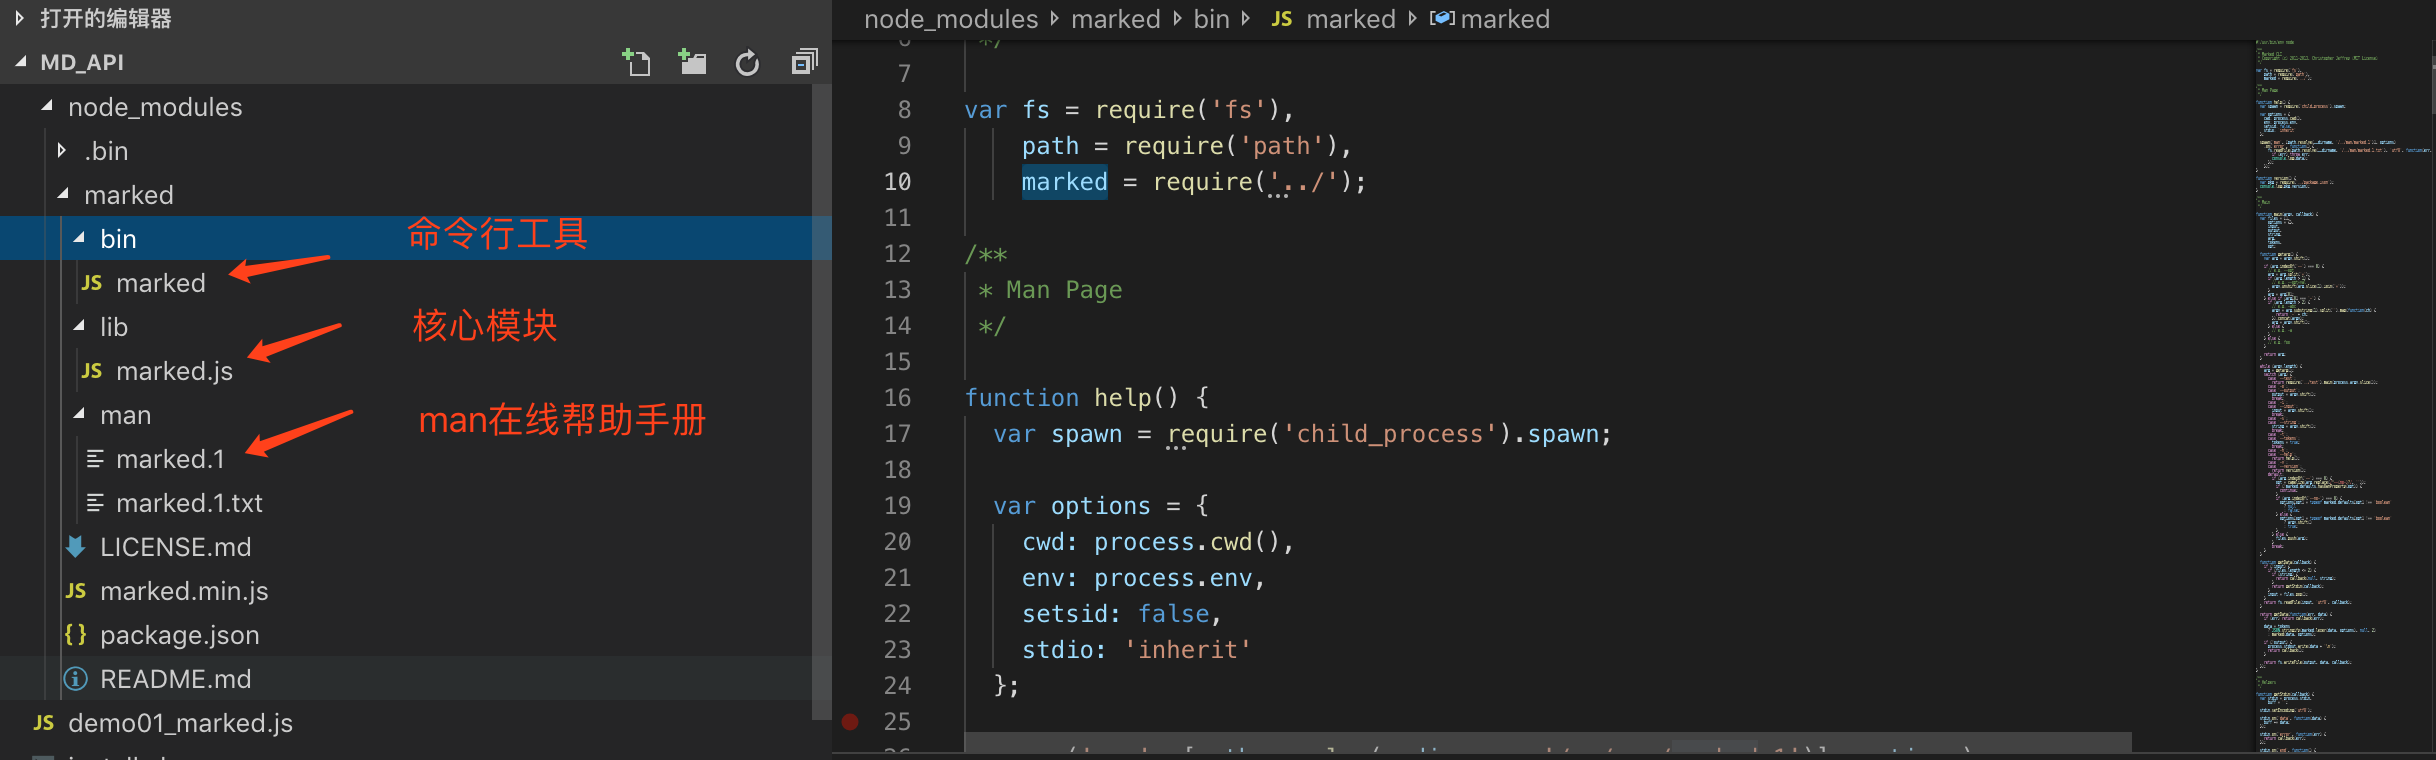

### 参考文档

- 官方站点提供了相对权威与翔实的参考文档：
    - `https://marked.js.org/`

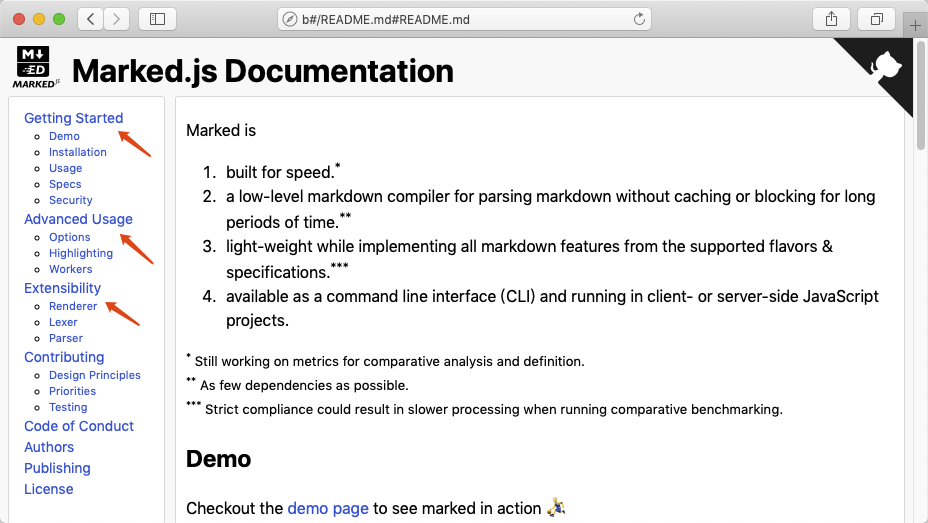

## 编程模式

### marked函数说明

- 函数原型：
    - `marked(markdownString [,options] [,callback])`
- 参数说明：
    - markdownString：被渲染的markdown字符串
        - 必须的参数
    - options：渲染选项
        - 可选参数
    - callback：渲染过程中的回调函数，用来干预渲染过程；
        - 可选参数，如果options不存在，则就是第二个参数；

### 命令行使用

- marked命令行，本质是javascript开发的脚本程序；
    - 其`--help`选项依赖安装的man目录下的`marked.1`文件；本地安装需要在合适的位置执行。因为marked帮助安装路径要求为`/man/marked.1`，下面是help选项的实现关键代码：
    
    
```javascript

  spawn('man', [path.resolve(__dirname, '/../man/marked.1')], options)
    .on('error', function() {
      fs.readFile(path.resolve(__dirname, '/../man/marked.1.txt'), 'utf8', function(err, data) {
        if (err) throw err;
        console.log(data);
      });
    });

```

- marked的使用三种方式
    1. 使用控制台作为输入（默认）
    2. 是使用字符串作为输入（-s选项）
    3. 使用文件作为输入，--input选项（-i）

- 使用命令行转换markdown文件为html

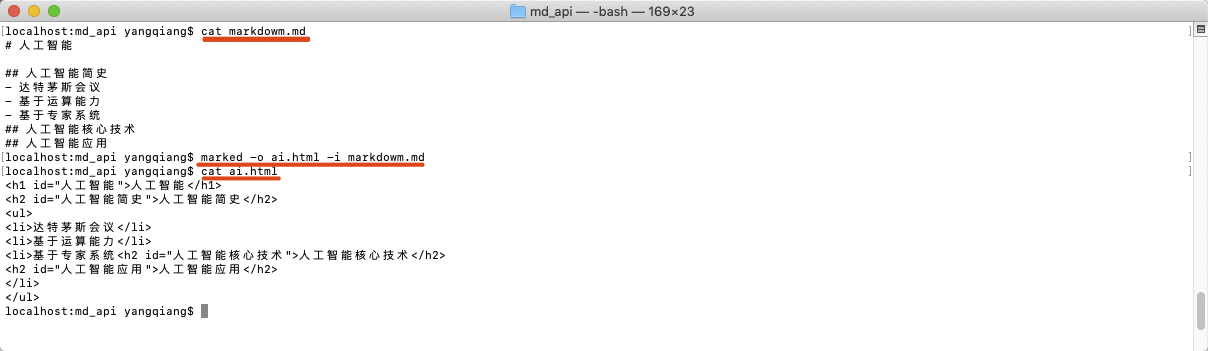

### node.js服务器端使用

```javascript

const marked = require('marked');


var str_html = marked("# 一级标题");
console.log(str_html);

```

### 浏览器端使用

```HTML
<!DOCTYPE html>
<html>
    <head>
        <title>Mmarked的使用</title>
        <meta charset="utf-8">
    </head>
    <body>
        <div id="app">

        </div>
        <script src="./node_modules/marked/lib/marked.js"></script>
        <script>
            var str_html = marked("# 一级标题");
            var dom_view = document.getElementById('app');
            dom_view.innerHTML = str_html;
        </script>
    </body>
</html>
```

## 高级特性

### 选项

选项 | 类型 | 缺省值 | 用途
-|-|-|-
baseUrl | string | null | 相对url的基地址
breaks	| boolean | 	false	|  添加 `<br>`标记，要求gfm为true.
gfm	 | boolean	| true	| 若为true, 这使用GitHub Flavored Markdown (GFM) 规范.
headerIds	| boolean	| true	| 若为true, 则 h1, h2, h3等标记天际一个id属性.
headerPrefix | string	| '' | 添加到h1, h2, h3等标记id属性的前缀.
highlight | function | null	| 用来高亮代码块的函数.
langPrefix | string	| 'language-' | 添加到`<code>`标记的`class`属性的字符串前缀.
mangle	| boolean | true	| 若为true, 自动链接的邮件地址转义为HTML字符引用.
pedantic | boolean | false | 如果为true，则尽可能遵循原始markdown.pl. 不修复最初的标记错误或行为. 关闭并覆盖gfm.
renderer | object | new Renderer() | 具有渲染markdown为HTML的函数的对象.
sanitize | boolean | false | 如果为true,则把HTML字符串转换为markdown字符串. 已经不推荐使用.
sanitizer | function | null | 把HTML转换为markdown的函数.
silent | boolean | false | 关闭解析器的异常抛出.
smartLists | boolean | false | 若为true，请使用比markdown.pl中的更智能的列表行为.
smartypants	| boolean | false | 若为true，则需要对引号和破折号等内容使用“智能”印刷标点符号.
xhtml | boolean | false | 若为true，则使用xml成对标记或者<img/>后缀标记.


### 高亮

- 上面的highlight选项需要依赖第三方模块高亮代码部分。
    - 所以高亮代码部分就是添加一些样式标记。这些样式标记依赖高亮模块提供的样式表。

- 高亮模块有
    - highlight.js: 已经不推荐使用，而且不支持浏览器直接运行；
    - pygmentize.js：支持荧光笔出发事件。
    - highlightjs.js: 

- highlightjs与lighlight的使用例子：

```javascript

const marked = require('marked');
const highlight = require('highlight');
const hl = require('highlightjs');



var str_markdown = '';
str_markdown += '# 人工智能\n';
str_markdown += '\n';
str_markdown += '## 人工智能简史\n';
str_markdown += '- 达特茅斯会议\n';
str_markdown += '- 基于运算能力\n';
str_markdown += '- 基于专家系统\n';
str_markdown += '## 人工智能核心技术\n';
str_markdown += '## 人工智能应用\n';
str_markdown += '\n';
str_markdown += '$a^2 + b ^2 = \dfrac{1}{2}$\n';
str_markdown += '\n';
str_markdown += '```C++\n';
str_markdown += '    int main(int argc, char** argv, char** arge){\n';
str_markdown += '        return  0;\n';
str_markdown += '   }\n';
str_markdown += '```\n';

var options = {
    headerIds: false,
    highlight: (code)=>{
        
        // var str_code = highlight.Highlight(code);   // highlight.js版本
        // console.log(code);
        var str_code = hl.highlightAuto(code).value;  // highlightjs.js版本
        return str_code;
    },
};

var str_html = marked(str_markdown, options);
console.log(str_html);

// node  demo04_marked_highlight.js
// package.json中配置的脚本




```

 - 运行结果：
 
 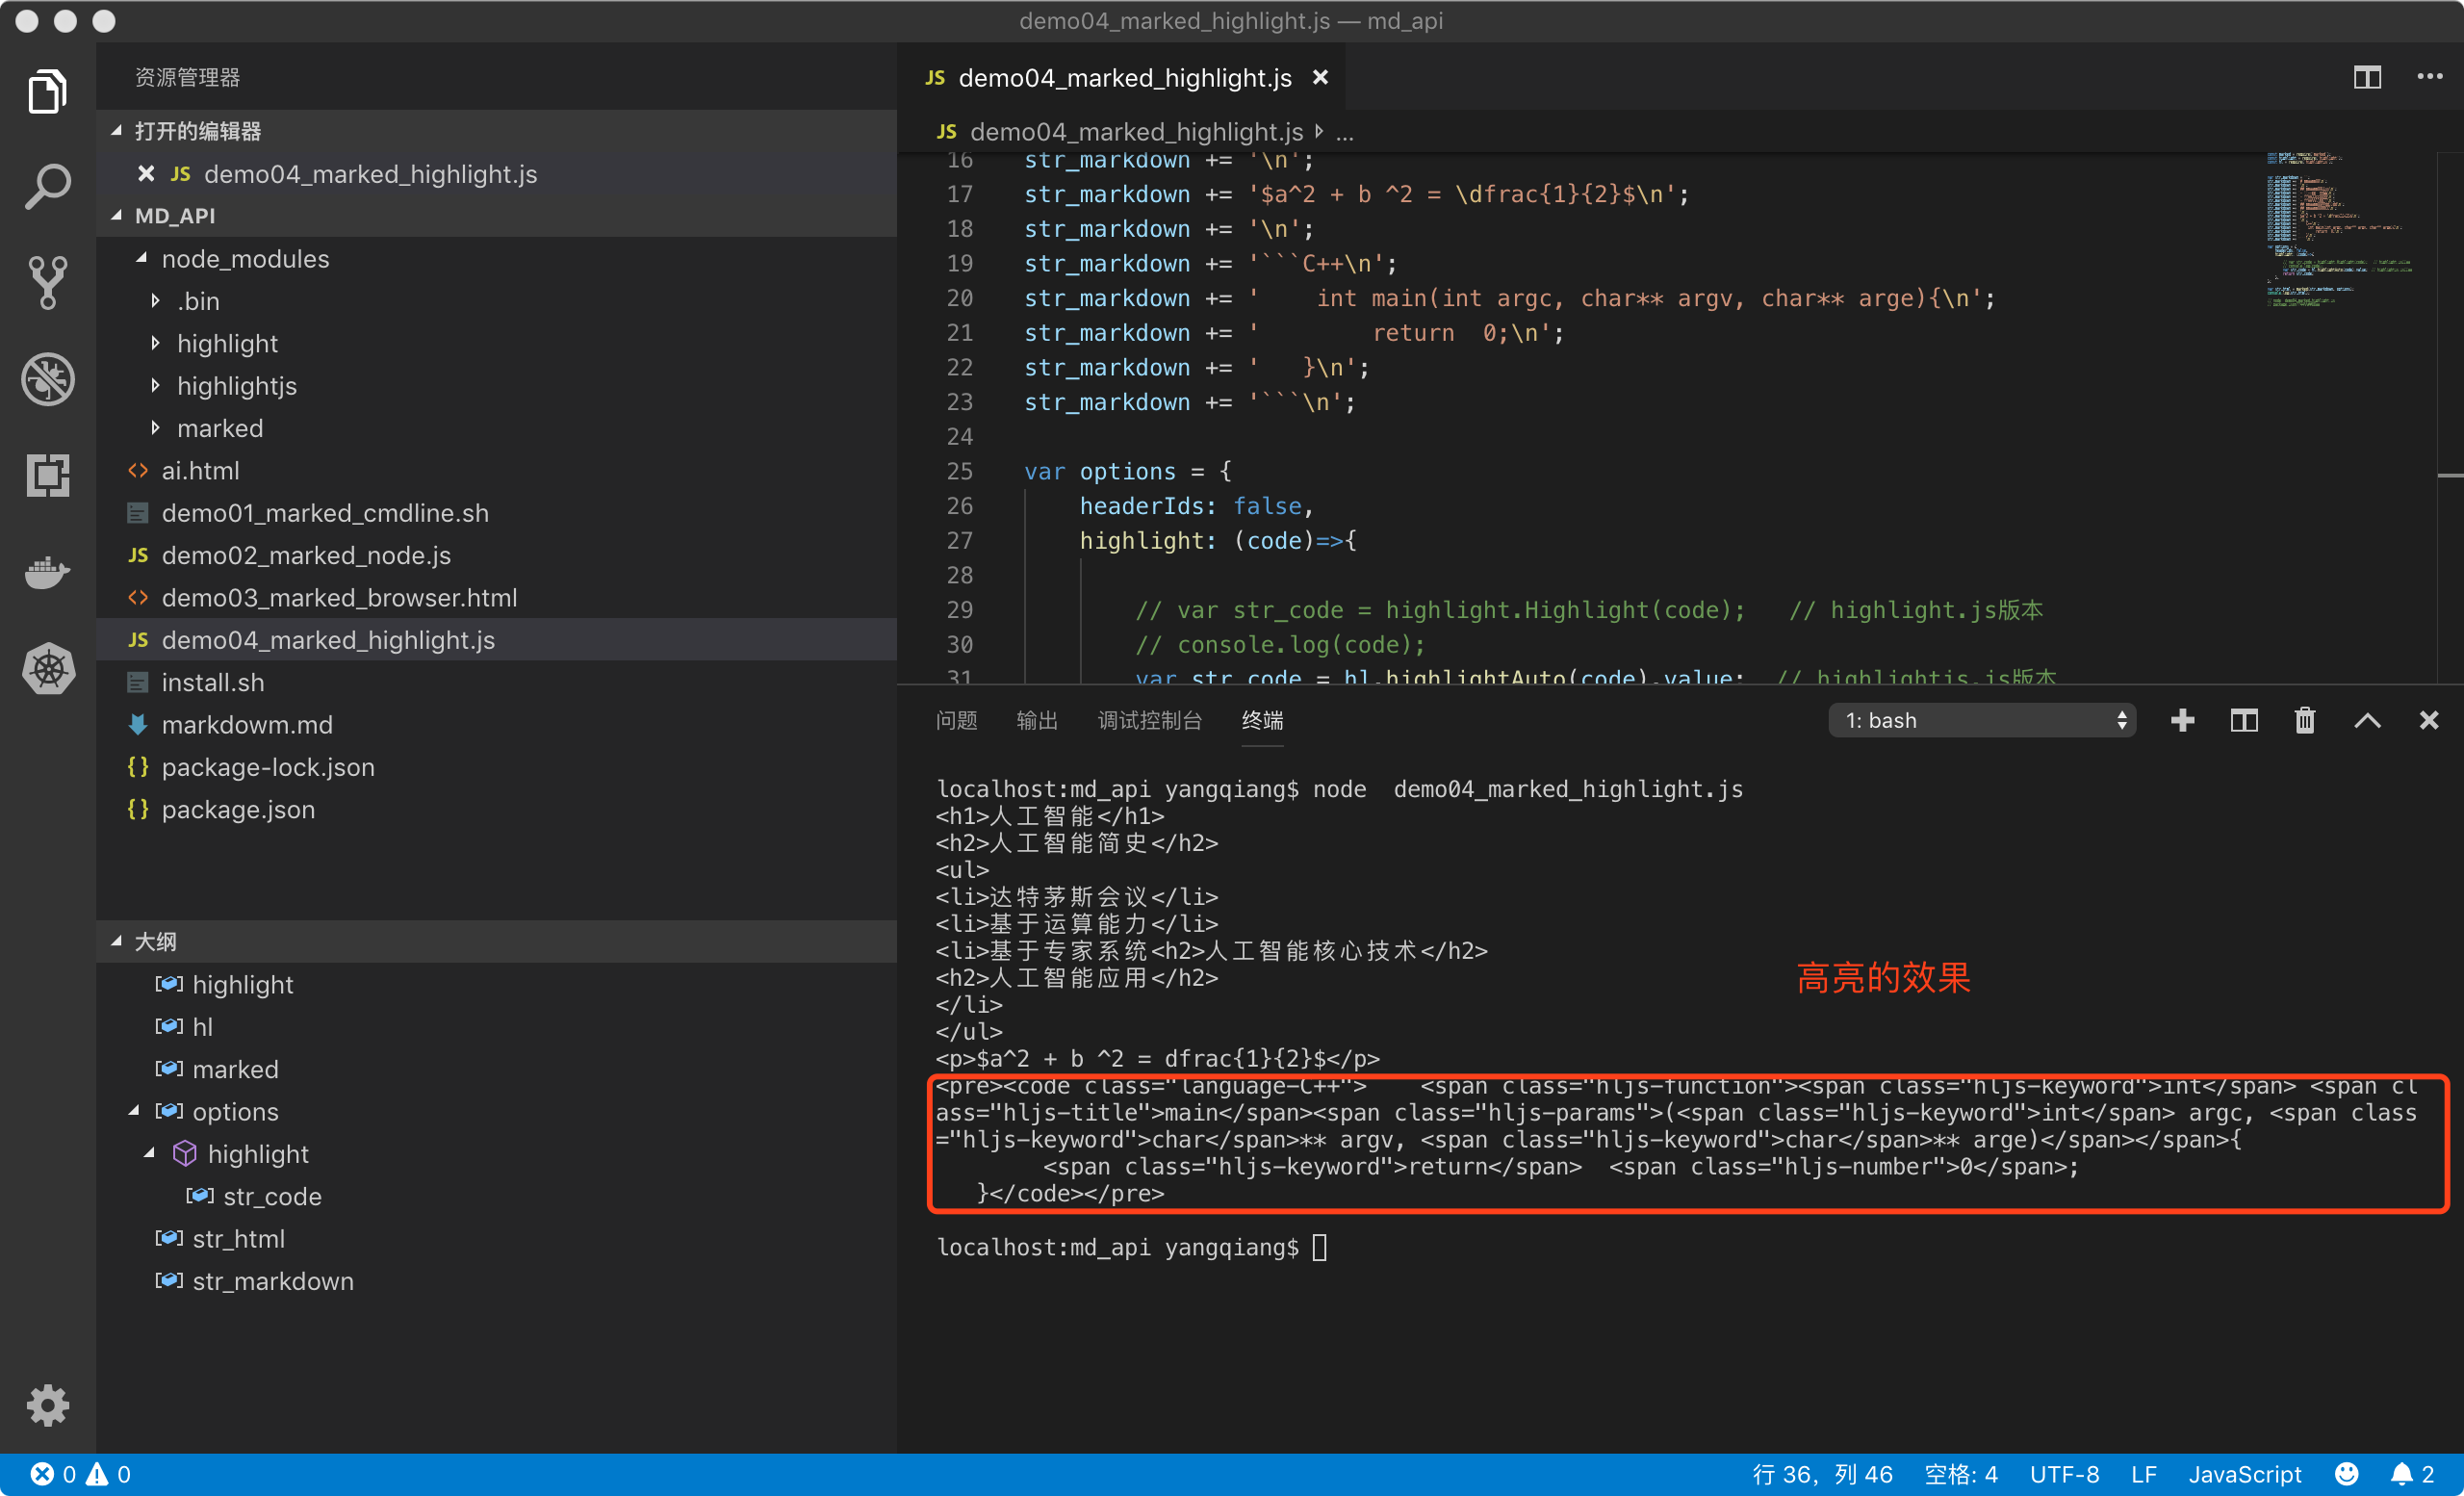

### 安全线程

- 线程安全主要是防止被ReDOS攻击，也就是把转换工作放在独立进程/线程中运行，如果响应太久就直接关闭进程/线程。这个技术属于Javascript提供的，node.js与浏览器（HTML5以后的标准）中实现的不同。

#### Node.js服务器端

```javascript

const marked = require('marked');
const { parentPort } = require('worker_threads');

parentPort.on('message', (markdownString) => {
  parentPort.postMessage(marked(markdownString));

});

```

#### 浏览器端

```javascript

// index.js

const { Worker } = require('worker_threads');
const markedWorker = new Worker('./markedWorker.js');

const markedTimeout = setTimeout(() => {
  markedWorker.terminate();
  throw new Error('Marked took too long!');
}, timeoutLimit);

markedWorker.on('message', (html) => {
  clearTimeout(markedTimeout);
  console.log(html);
  markedWorker.terminate();
});

markedWorker.postMessage(markdownString);

```

## 扩展

### 渲染器Renderer

#### renderer的使用模式

- marked提供了markdown中特殊的渲染处理
    - 传递读取的markdown数据，交给用户自己处理需要返回的html标记。下面是一个例子：

```javascript
    

const marked = require('marked');
const renderer = new marked.Renderer();

renderer.heading = function (text, level) {
  const escapedText = text.toLowerCase().replace(/[^\w]+/g, '-');

  return `
          <h${level}>
            <a name="${escapedText}" class="anchor" href="#${escapedText}">
              <span class="header-link"></span>
            </a>
            ${text}
          </h${level}>`;
};


console.log(marked('# heading+', { renderer: renderer }));

```

#### renderer的渲染函数定义

1. code(string code, string infostring, boolean escaped)
2. blockquote(string quote)
3. html(string html)
4. heading(string text, number level, string raw, Slugger slugger)
5. hr()
6. list(string body, boolean ordered, number start)
7. listitem(string text, boolean task, boolean checked)
8. checkbox(boolean checked)
9. paragraph(string text)
10. table(string header, string body)
11. tablerow(string content)
12. tablecell(string content, object flags)

13. strong(string text)
14. em(string text)
15. codespan(string code)
16. br()
17. del(string text)
18. link(string href, string title, string text)
19. image(string href, string title, string text)
20. text(string text)

### 解析器Lexer与Parser

- 这是过程与前面的使用一样的效果，中间多了一个解析过程
    - Lexer

- 下面使用例子来说明：

```javascript

const marked = require('marked');

const md = `
> 这是应用
`;

const tokens = marked.lexer(md);   // 解析成一个更加详细描述的数组；
console.log(tokens);
console.log('--------------------------------');

const html = marked.parser(tokens);
console.log(html);    // 处理结果与前面一样；
console.log('--------------------------------');

console.log(tokens);  // 处理后就空了；

// node  demo06_marked_lexer.js
```

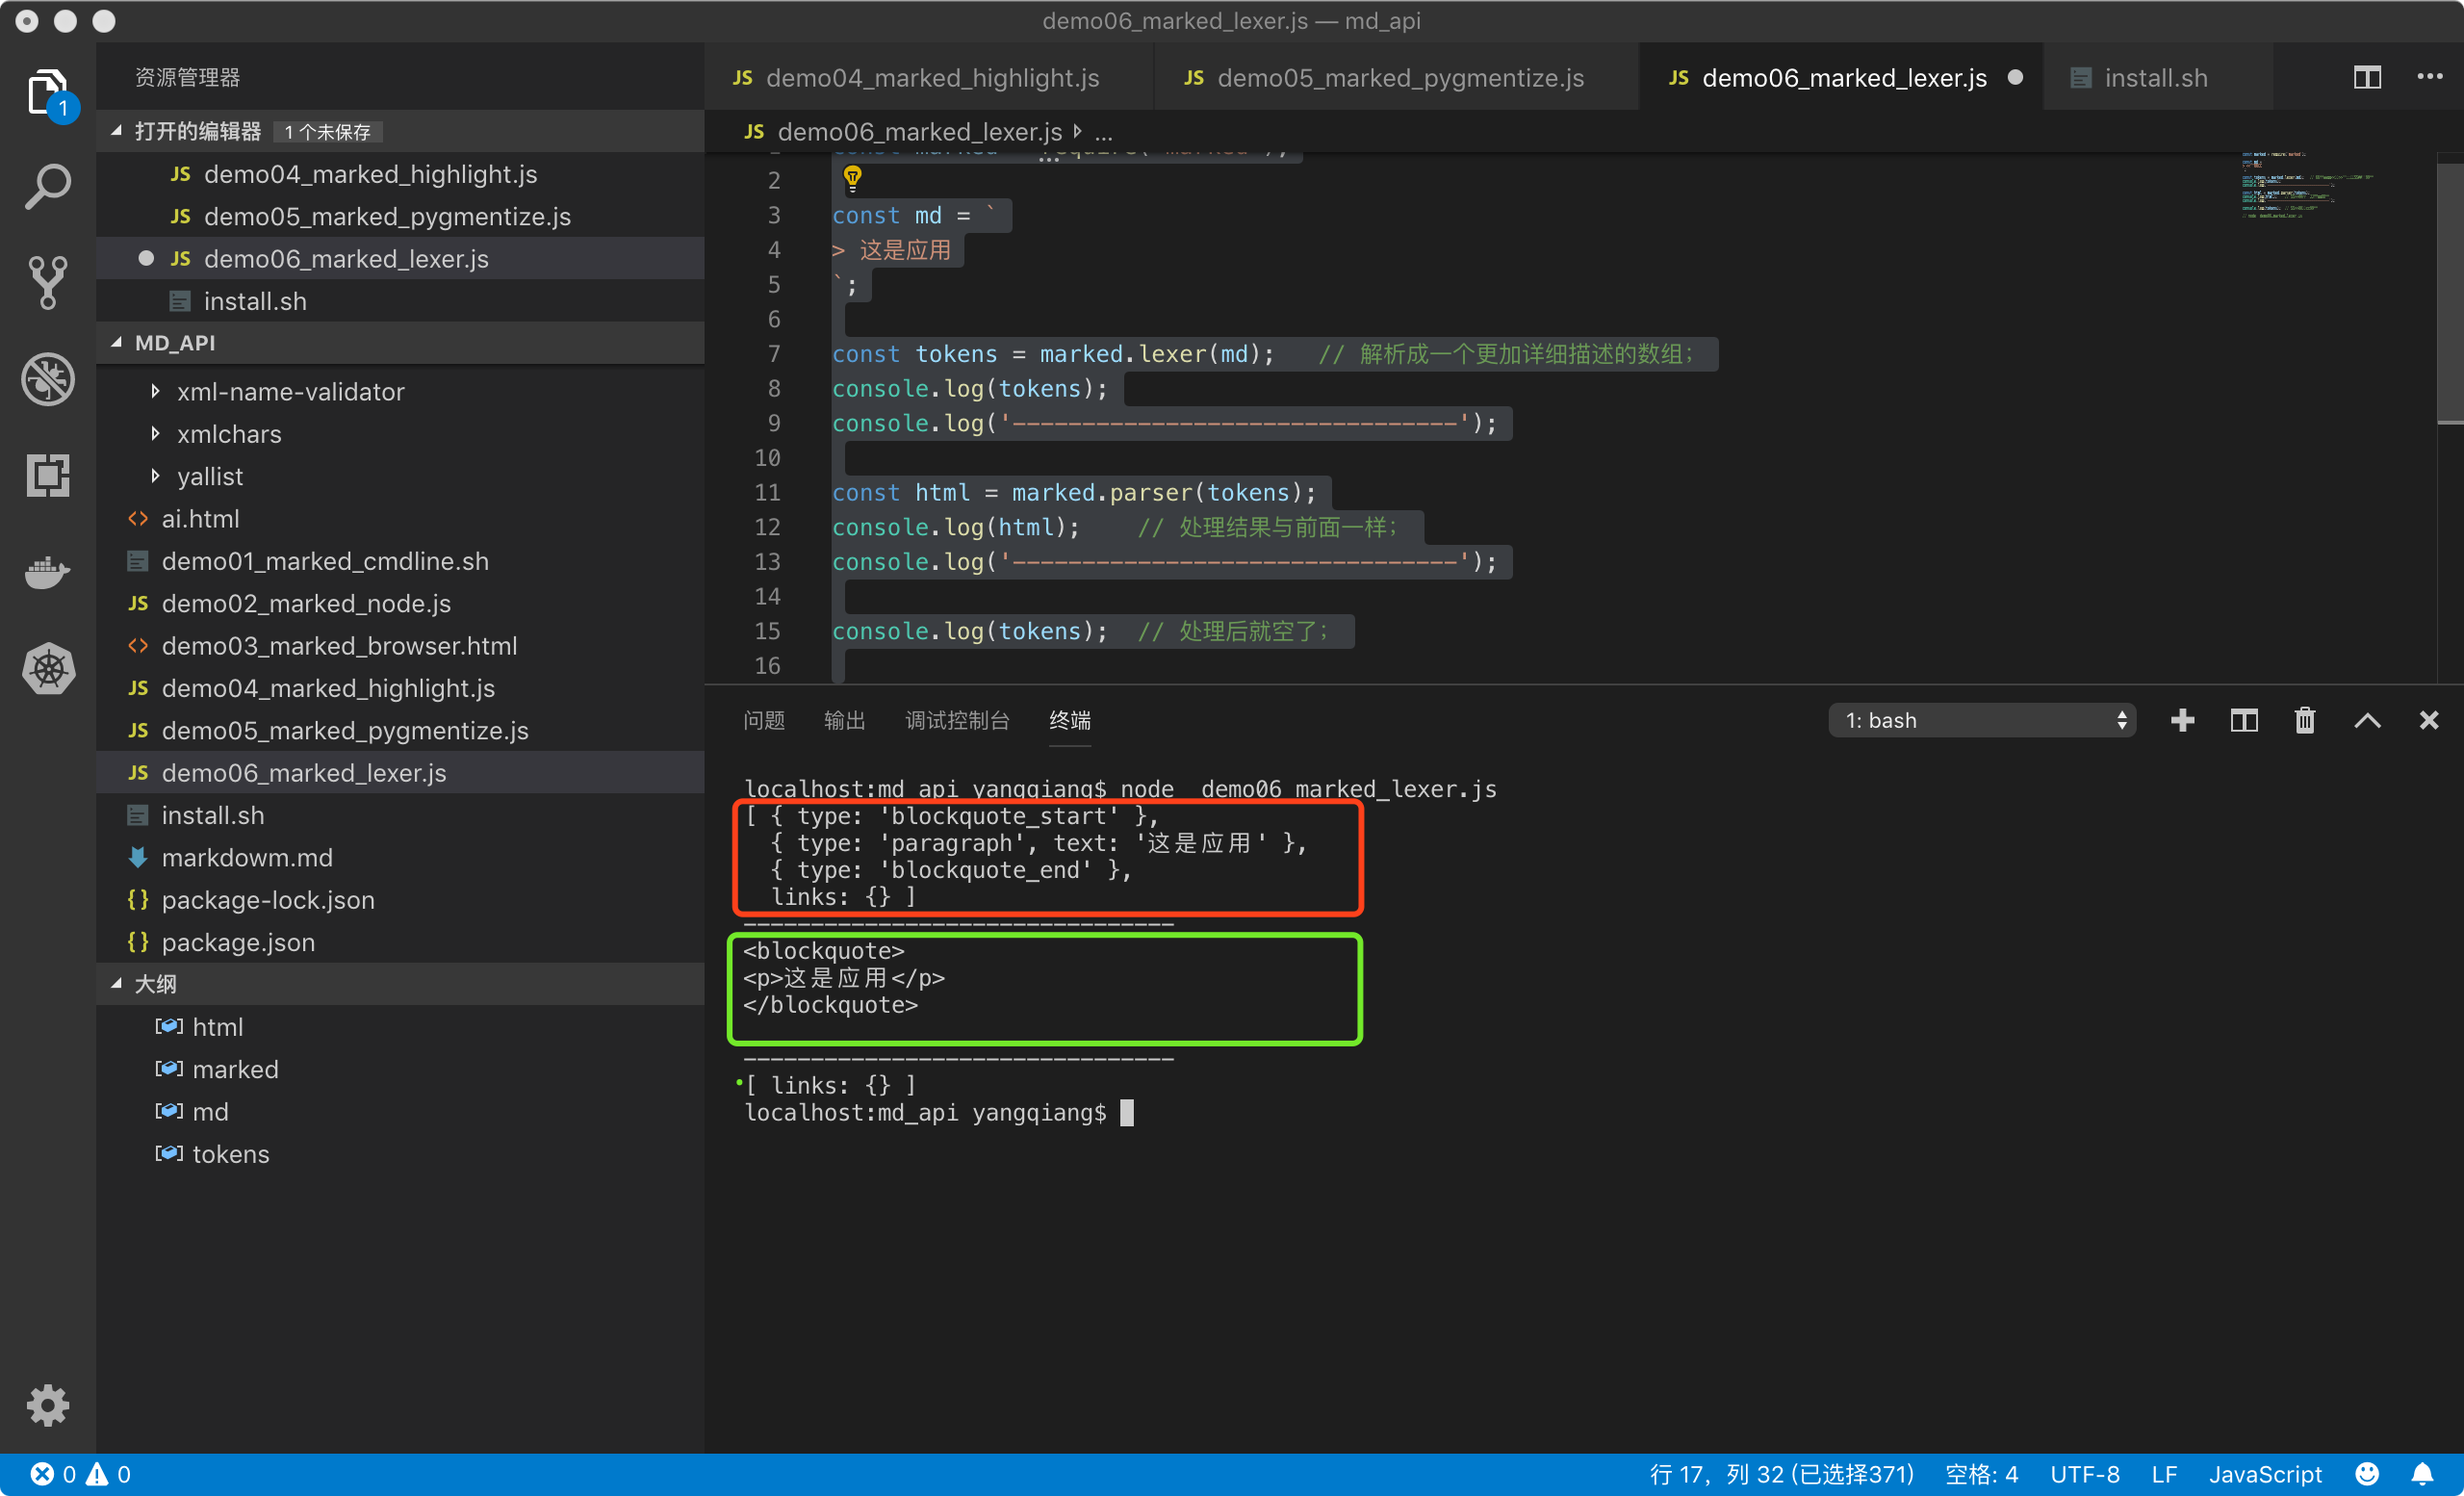

# 其他框架

- 还有一些与markdow有关的框架，后面放在Vue的开发框架中说明！


1.  vue-markdown-loader与markdown-it-container框架
2. MathJX框架：解决数学公式
3. mermaid框架：解决流程图

- 还有一些其他与markdown有关的模块：
    - vue-freemde符合Vue使用方式的模块。
    - mermaid-loader Vue加载器

----